In [78]:
# Standard libraries
import sys
import os
import json
import importlib
import string
import math
import re

# Third party libraries
import pandas as pd
import numpy as np
import xlsxwriter
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode(connected=True)

## Notice

1. The use of these data for direct country-to-country comparisons is not advisable because the database comprises  data  collected  using  different  methodologies. 
2. EU Member States used different methods to collect food consumption data, which sometimes made it difficult to carry out EU-wide analyses or country-to-country comparisons. EFSA’s EU Menu project aims to provide standardised information on what people eat in all countries and regions across the EU. This allows more accurate exposure assessments and ultimately supports risk managers in their decision-making on food safety.
3. infants  (2 surveys  from 2 Member States), toddlers (8  surveys  from  8  Member  States),  children  (16  surveys  from  14  Member  States),  adolescents  (14 surveys from 12 Member States), adults (21 surveys from 20 Member States), elderly (9 surveys from 9 Member States) and very elderly (8 surveys from 8 Member States) for a total of 32 different dietary surveys carried out in 22 different Member States.
4. Food consumption statistics are reported both in **grams/day and in grams/kg body weight per day**,  for  both  chronic  and  acute  consumption. Summary  statistics  from  the  Comprehensive Database  can  be  used  as  a  quick  screening  tool  to  assess  chronic  and  acute  exposure  to  hazardous substances.
5. 13  different  Member  States  were  used  to  carry  out  exposure  assessment  studies  in  children  (in particular young children, 1-3 years old) for food colours (Huybrechts et al., 2010), selenium (Sioen et al., 2010), chromium (Boon et al. 2010a) and lead (Boon et al. 2010b)
6. The new system should address the needs of most Units in EFSA and be accepted by EFSA‘s Member State networks  on  data  collection  regarding  food  consumption,  occurrence  of  chemical  contaminants  and residues as well as microbiological hazards. The WG is expected to finalise the above mentioned work by the end of 2011.
7. The breakdown  of  certain  cereal  products  (e.g.  bread,  porridges  and  fine  bakery  ware)  into  their  basic ingredients,  like  flour  or  other  milling  products  and  other  basic  ingredients  may  result  in  a  shift  in apparent  consumption  of  cereal  products  to  basic  milling  products.  In  some  countries  for  instance consumption of bread and fine bakery ware may be very low or not seen at all, whereas consumption of  basic  milling  products  may  be  higher  than  in  other  countries.  
8. In  16  surveys  the  study  population  was  sampled  at  individual  level  whereas  in  the  remaining  6 surveys, it was sampled at household level. 
9. All surveys considered were stratified for gender and age groups with the exception of Austria. 
10. **Consequently, individual   food   consumption   data   are   stored   by   EFSA.   Only   summary   statistics   from   the Comprehensive Database are made available to the public on the EFSA website**

11. The following age classes have been considered: 1. Infants:  up to and including 11 months 2. Toddlers: from 12 up to and including 35 months of age 3. Other children:  from 36 months up to and including 9 years of age 4. Adolescents:      from 10 up to and including 17 years of age 5. Adults:   from 18 up to and including 64 years of age 6. Elderly:  from 65 up to and including 74 years of age 7.  Very elderly:     from 75 years of age and older

## Ideas
1. We look at the data at national level
2. The overall objective of collecting data on food consumption is to support the exposure assessment process. 

## Research question
1. which country is lacking of meat, fruit
2. Adults overall, how far are they below the mandatory consumption?
3. How does the consumption of food change over different ages?

In [5]:
df1 = pd.read_excel("./downloads/chronicgdayconsumers.xlsx", sheet_name = 'L1_Consumers_only_g_day', skiprows=[0,1])
df2 = pd.read_excel("./downloads/chronicgdayconsumers.xlsx", sheet_name = 'L2_Consumers_only_g_day', skiprows=[0,1])
df3 = pd.read_excel("./downloads/chronicgdayconsumers.xlsx", sheet_name = 'L3_Consumers_only_g_day', skiprows=[0,1])
df4 = pd.read_excel("./downloads/chronicgdayconsumers.xlsx", sheet_name = 'L4_Consumers_only_g_day', skiprows=[0,1])

display(df1.head())
df1.info()

,Country,Survey,Pop Class,Foodex L1,Metrics,Nr Consumers,% Consumers,Mean,STD,P5,P10,Median,P95,P97.5,P99,Comment
0,Austria,Austrian Study on Nutritional Status 2010-12 -...,Adults,Grains and grain-based products,A.01.000001,305,0.990260,248.263443,120.639687,75.0,100.0,241.0000,477.25,527.75,578.25,
1,Austria,Austrian Study on Nutritional Status 2010-12 -...,Adults,Vegetables and vegetable products (including f...,A.01.000317,246,0.798701,112.080081,92.801409,10.0,20.0,93.6875,303.00,356.50,431.00,
2,Austria,Austrian Study on Nutritional Status 2010-12 -...,Adults,Starchy roots and tubers,A.01.000467,109,0.353896,88.383028,53.135490,32.5,35.0,70.5000,219.50,243.75,250.00,
3,Austria,Austrian Study on Nutritional Status 2010-12 -...,Adults,"Legumes, nuts and oilseeds",A.01.000486,71,0.230519,34.176056,40.927405,3.0,5.0,20.0000,100.00,190.50,270.00,
4,Austria,Austrian Study on Nutritional Status 2010-12 -...,Adults,Fruit and fruit products,A.01.000544,263,0.853896,191.564544,149.530116,25.0,35.0,152.5000,447.00,554.25,809.00,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 16 columns):
Country         2133 non-null object
Survey          2133 non-null object
Pop Class       2133 non-null object
Foodex L1       2133 non-null object
Metrics         2133 non-null object
Nr Consumers    2133 non-null int64
% Consumers     2133 non-null float64
Mean            2133 non-null float64
STD             2133 non-null float64
P5              2133 non-null float64
P10             2133 non-null float64
Median          2133 non-null float64
P95             2133 non-null float64
P97.5           2133 non-null float64
P99             2133 non-null float64
Comment         2133 non-null object
dtypes: float64(9), int64(1), object(6)
memory usage: 266.7+ KB


In [ ]:
#df2.head()
#df3.head()
#df4.head()
list(df1.columns)
print(df1['Level 1 FoodEx Name'].unique()) #21

In [ ]:
print(list(df2.columns))
print(df2['Level 2 FoodEx Name'].unique()) #160

In [12]:
print(list(df3.columns))
print(df3['Level 3 FoodEx Name'].nunique()) #1156

['Country of the dietary survey', 'Dietary survey', 'Population Class', 'Level 2 FoodEx Name', 'Level 3 FoodEx Name', 'Level 3 FoodEx Code', 'Number of consumers', 'Percentage of consumers', 'Mean consumption in grams/day', 'Standard Deviation of consumption in grams/day', '5th percentile of consumption in grams/day', '10th percentile of consumption in grams/day', 'Median consumption in grams/day', '95th percentile of consumption in grams/day', '97.5th percentile of consumption in grams/day', '99th percentile of consumption in grams/day', 'Comment']
1156


In [19]:
print(list(df4.columns))
print(df4['Population Class'].nunique()) #10
print(df4['Population Class'].unique()) #10
print(df4['Level 4 FoodEx Name'].nunique()) #1554
print(list(df4['Level 4 FoodEx Name'].unique()))

['Country of the dietary survey', 'Dietary survey', 'Population Class', 'Level 3 FoodEx Name', 'Level 4 FoodEx Name', 'Level 4 FoodEx Code', 'Number of consumers', 'Percentage of consumers', 'Mean consumption in grams/day', 'Standard Deviation of consumption in grams/day', '5th percentile of consumption in grams/day', '10th percentile of consumption in grams/day', 'Median consumption in grams/day', '95th percentile of consumption in grams/day', '97.5th percentile of consumption in grams/day', '99th percentile of consumption in grams/day', 'Comment']
10
['Pop Class' 'Adults' 'Elderly' 'Very elderly' 'Other children'
 'Adolescents' 'Toddlers' 'Infants' 'Lactating women' 'Pregnant women']
1554
['Foodex L4', 'Wheat grain, Durum', 'Barley grain', 'Rice, long-grain', 'Rice, parboiled', 'Rice, white', 'Rice, wild', 'Other grains', 'Wheat milling products', 'Couscous', 'Buckwheat groats', 'Millet groats', 'Bread and rolls', 'Wheat bread, white', 'Wheat bread, brown', 'Rye bread and rolls', 'Ry

In [11]:
#---------------  ---------------
#--------------- Check the 1st level ---------------
df1.head(2)

df1.Country.nunique() #19

19

In [13]:
Belgium_df1 = df1[df1['Country']=='Belgium']
display(Belgium_df1)

,Country,Survey,Pop Class,Foodex L1,Metrics,Nr Consumers,% Consumers,Mean,STD,P5,P10,Median,P95,P97.5,P99,Comment
93,Belgium,Diet National 2004,Adolescents,Grains and grain-based products,A.01.000001,576,1.000000,259.756858,127.227055,82.500000,116.900000,241.250000,488.300000,553.000000,688.500000,
94,Belgium,Diet National 2004,Adolescents,Vegetables and vegetable products (including f...,A.01.000317,528,0.916667,103.187689,83.139321,7.000000,15.450000,85.850000,267.150000,330.550000,376.500000,
95,Belgium,Diet National 2004,Adolescents,Starchy roots and tubers,A.01.000467,465,0.807292,116.302903,79.636772,31.000000,31.300000,96.750000,266.000000,317.500000,359.650000,
96,Belgium,Diet National 2004,Adolescents,"Legumes, nuts and oilseeds",A.01.000486,131,0.227431,37.686641,25.859027,7.500000,12.000000,30.000000,85.500000,99.000000,110.000000,
97,Belgium,Diet National 2004,Adolescents,Fruit and fruit products,A.01.000544,380,0.659722,132.978553,108.562427,10.850000,20.000000,99.450000,353.700000,431.700000,481.950000,
98,Belgium,Diet National 2004,Adolescents,Meat and meat products (including edible offal),A.01.000727,554,0.961806,113.883574,77.764845,21.500000,30.350000,98.125000,265.000000,289.000000,334.750000,
99,Belgium,Diet National 2004,Adolescents,"Fish and other seafood (including amphibians, ...",A.01.000876,188,0.326389,46.226330,35.839478,8.000000,12.000000,38.900000,121.500000,135.000000,198.100000,
100,Belgium,Diet National 2004,Adolescents,Milk and dairy products,A.01.000948,540,0.937500,228.614077,204.861413,17.050000,28.150000,170.025000,618.400000,779.600000,1052.400000,
101,Belgium,Diet National 2004,Adolescents,Eggs and egg products,A.01.001252,227,0.394097,24.466960,26.584584,1.700000,2.350000,12.500000,88.100000,96.000000,101.150000,
102,Belgium,Diet National 2004,Adolescents,Sugar and confectionary,A.01.001267,464,0.805556,40.120431,34.296552,5.000000,8.500000,30.000000,102.500000,128.000000,153.300000,


In [8]:
# Check the nr of survey for each country & Pop class
df1.groupby(['Country','Pop Class']).count()

Survey  Foodex L1  Metrics  Nr Consumers  \
Country        Pop Class                                                  
Austria        Adolescents         18         18       18            18   
               Adults              19         19       19            19   
               Elderly             19         19       19            19   
               Other children      19         19       19            19   
               Very elderly        18         18       18            18   
Belgium        Adolescents         20         20       20            20   
               Adults              20         20       20            20   
               Elderly             20         20       20            20   
               Other children      20         20       20            20   
               Toddlers            18         18       18            18   
               Very elderly        20         20       20            20   
Bulgaria       Infants             19         19       19            19   
               Other children      20         20       20            20   
               Toddlers            19         19       19            19   
Cyprus         Adolescents         19         19       19            19   
Czech Republic Adolescents         19         19       19            19   
               Adults              20         20       20            20   
               Other children      19         19       19            19   
Denmark        Adolescents         35         35       35            35   
               Adults              35         35       35            35   
               Elderly             35         35       35            35   
               Infants             18         18       18            18   
               Other children      35         35       35            35   
               Toddlers            19         19       19            19   
               Very elderly        35         35       35            35   
Finland        Adolescents         19         19       19            19   
               Adults              39         39       39            39   
               Elderly             38         38       38            38   
               Infants             19         19       19            19   
               Other children      59         59       59            59   
...                               ...        ...      ...           ...   
Italy          Very elderly        20         20       20            20   
Latvia         Adolescents         19         19       19            19   
               Adults              19         19       19            19   
               Other children      18         18       18            18   
               Pregnant women      18         18       18            18   
Netherlands    Adolescents         20         20       20            20   
               Adults              40         40       40            40   
               Elderly             38         38       38            38   
               Other children      40         40       40            40   
               Toddlers            20         20       20            20   
               Very elderly        20         20       20            20   
Romania        Adults              19         19       19            19   
               Elderly             18         18       18            18   
               Very elderly        18         18       18            18   
Spain          Adolescents         54         54       54            54   
               Adults              39         39       39            39   
               Other children      36         36       36            36   
               Toddlers            16         16       16            16   
Sweden         Adolescents         20         20       20            20   
               Adults              38         38       38            38   
               Elderly             19         19       1

In [15]:
#--------------- Preference map in Belgium---------------
df1_belgium = df1[df1['Country']=='Belgium']
df1_belgium.head()

,Country,Survey,Pop Class,Foodex L1,Metrics,Nr Consumers,% Consumers,Mean,STD,P5,P10,Median,P95,P97.5,P99,Comment
93,Belgium,Diet National 2004,Adolescents,Grains and grain-based products,A.01.000001,576,1.000000,259.756858,127.227055,82.50,116.90,241.25,488.30,553.00,688.50,
94,Belgium,Diet National 2004,Adolescents,Vegetables and vegetable products (including f...,A.01.000317,528,0.916667,103.187689,83.139321,7.00,15.45,85.85,267.15,330.55,376.50,
95,Belgium,Diet National 2004,Adolescents,Starchy roots and tubers,A.01.000467,465,0.807292,116.302903,79.636772,31.00,31.30,96.75,266.00,317.50,359.65,
96,Belgium,Diet National 2004,Adolescents,"Legumes, nuts and oilseeds",A.01.000486,131,0.227431,37.686641,25.859027,7.50,12.00,30.00,85.50,99.00,110.00,
97,Belgium,Diet National 2004,Adolescents,Fruit and fruit products,A.01.000544,380,0.659722,132.978553,108.562427,10.85,20.00,99.45,353.70,431.70,481.95,


In [27]:
df1.groupby(['Country','Pop Class']).count()

Survey  Foodex L1  Metrics  Nr Consumers  \
Country        Pop Class                                                  
Austria        Adolescents         18         18       18            18   
               Adults              19         19       19            19   
               Elderly             19         19       19            19   
               Other children      19         19       19            19   
               Very elderly        18         18       18            18   
Belgium        Adolescents         20         20       20            20   
               Adults              20         20       20            20   
               Elderly             20         20       20            20   
               Other children      20         20       20            20   
               Toddlers            18         18       18            18   
               Very elderly        20         20       20            20   
Bulgaria       Infants             19         19       19            19   
               Other children      20         20       20            20   
               Toddlers            19         19       19            19   
Cyprus         Adolescents         19         19       19            19   
Czech Republic Adolescents         19         19       19            19   
               Adults              20         20       20            20   
               Other children      19         19       19            19   
Denmark        Adolescents         35         35       35            35   
               Adults              35         35       35            35   
               Elderly             35         35       35            35   
               Infants             18         18       18            18   
               Other children      35         35       35            35   
               Toddlers            19         19       19            19   
               Very elderly        35         35       35            35   
Finland        Adolescents         19         19       19            19   
               Adults              39         39       39            39   
               Elderly             38         38       38            38   
               Infants             19         19       19            19   
               Other children      59         59       59            59   
...                               ...        ...      ...           ...   
Italy          Very elderly        20         20       20            20   
Latvia         Adolescents         19         19       19            19   
               Adults              19         19       19            19   
               Other children      18         18       18            18   
               Pregnant women      18         18       18            18   
Netherlands    Adolescents         20         20       20            20   
               Adults              40         40       40            40   
               Elderly             38         38       38            38   
               Other children      40         40       40            40   
               Toddlers            20         20       20            20   
               Very elderly        20         20       20            20   
Romania        Adults              19         19       19            19   
               Elderly             18         18       18            18   
               Very elderly        18         18       18            18   
Spain          Adolescents         54         54       54            54   
               Adults              39         39       39            39   
               Other children      36         36       36            36   
               Toddlers            16         16       16            16   
Sweden         Adolescents         20         20       20            20   
               Adults              38         38       38            38   
               Elderly             19         19       1

In [123]:
df1_belgium_pref = df1_belgium[['Pop Class','Nr Consumers', 'Foodex L1']]
df1_belgium_pref2 = pd.pivot_table(df1_belgium_pref, values='Nr Consumers', index=['Pop Class'],columns=['Foodex L1'])
df1_belgium_pref2
diagonal = [6000, 6000,6000,6000,5400,6000]
df1_belgium_pref3 = (df1_belgium_pref2.T/diagonal).T


df1_belgium_pref3 = df1_belgium_pref3.fillna(0)
df1_belgium_pref3
df1_belgium_pref3.to_excel('./pop_class_driver.xlsx')

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
%matplotlib inline

class CA(object):
    """Simple corresondence analysis.
    
    Inputs
    ------
    ct : array_like
      Two-way contingency table. If `ct` is a pandas DataFrame object,
      the index and column values are used for plotting.
    Notes
    -----
    The implementation follows that presented in 'Correspondence
    Analysis in R, with Two- and Three-dimensional Graphics: The ca
    Package,' Journal of Statistical Software, May 2007, Volume 20,
    Issue 3.
    """

    def __init__(self, ct):
        self.rows = ct.index.values if hasattr(ct, 'index') else None
        self.cols = ct.columns.values if hasattr(ct, 'columns') else None
        
        # contingency table
        N = np.matrix(ct, dtype=float)

        # correspondence matrix from contingency table
        P = N / N.sum()

        # row and column marginal totals of P as vectors
        r = P.sum(axis=1)
        c = P.sum(axis=0).T

        # diagonal matrices of row/column sums
        D_r_rsq = np.diag(1. / np.sqrt(r.A1))
        D_c_rsq = np.diag(1. / np.sqrt(c.A1))

        # the matrix of standarized residuals
        S = D_r_rsq * (P - r * c.T) * D_c_rsq

        # compute the SVD
        U, D_a, V = svd(S, full_matrices=False)
        D_a = np.asmatrix(np.diag(D_a))
        V = V.T

        # principal coordinates of rows
        F = D_r_rsq * U * D_a

        # principal coordinates of columns
        G = D_c_rsq * V * D_a

        # standard coordinates of rows
        X = D_r_rsq * U

        # standard coordinates of columns
        Y = D_c_rsq * V

        # the total variance of the data matrix
        inertia = sum([(P[i,j] - r[i,0] * c[j,0])**2 / (r[i,0] * c[j,0])
                       for i in range(N.shape[0])
                       for j in range(N.shape[1])])

        self.F = F.A
        self.G = G.A
        self.X = X.A
        self.Y = Y.A
        self.inertia = inertia
        self.eigenvals = np.diag(D_a)**2

    def plot(self):
        """Plot the first and second dimensions."""
        xmin, xmax = None, None
        ymin, ymax = None, None
        if self.rows is not None:
            for i, t in enumerate(self.rows):
                x, y = self.F[i,0], self.F[i,1]
                plt.text(x, y, t, va='center', ha='center', color='r')
                xmin = min(x, xmin if xmin else x)
                xmax = max(x, xmax if xmax else x)
                ymin = min(y, ymin if ymin else y)
                ymax = max(y, ymax if ymax else y)
        else:
            plt.plot(self.F[:, 0], self.F[:, 1], 'ro')

        if self.cols is not None:
            for i, t in enumerate(self.cols):
                x, y = self.G[i,0], self.G[i,1]
                plt.text(x, y, t, va='center', ha='center', color='b')
                xmin = min(x, xmin if xmin else x)
                xmax = max(x, xmax if xmax else x)
                ymin = min(y, ymin if ymin else y)
                ymax = max(y, ymax if ymax else y)
        else:
            plt.plot(self.G[:, 0], self.G[:, 1], 'bs')

        if xmin and xmax:
            pad = (xmax - xmin) * 0.1
            plt.xlim(xmin - pad, xmax + pad)
        if ymin and ymax:
            pad = (ymax - ymin) * 0.1
            plt.ylim(ymin - pad, ymax + pad)

        plt.grid()
        plt.xlabel('Dim 1')
        plt.ylabel('Dim 2')

    def scree_diagram(self, perc=True, *args, **kwargs):
        """Plot the scree diagram."""
        eigenvals = self.eigenvals
        xs = np.arange(1, eigenvals.size + 1, 1)
        ys = 100. * eigenvals / eigenvals.sum() if perc else eigenvals
        plt.plot(xs, ys, *args, **kwargs)
        plt.xlabel('Dimension')
        plt.ylabel('Eigenvalue' + (' [%]' if perc else ''))


def _test():
    import pandas as pd
    
    # hereby we import the dataset
    # Either blinded data or branded data
    df = df1_belgium_pref3

    
#     df = df.set_index('BRANDS')

#     print(df.describe())
#     print(df.head())

    ca = CA(df)

    plt.figure(100)
    ca.plot()

    plt.figure(101)
    ca.scree_diagram()

    plt.show()
    return ca

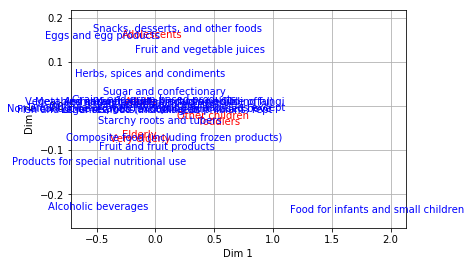

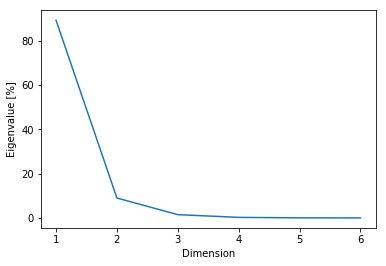

In [81]:
ca = _test()

In [82]:
beers_list

['Adolescents',
 'Adults',
 'Elderly',
 'Other children',
 'Toddlers',
 'Very elderly']

In [88]:
beers_list = []
x_list = []
y_list= []

occ_list = []
x_occ = []
y_occ = []

for i, t in enumerate(ca.rows):
    x, y = ca.F[i,0]*(-1), ca.F[i,1]*(-1)
    beers_list.append(t)
    x_list.append(x)
    y_list.append(y)
    
for i, t in enumerate(ca.cols):
    x, y = ca.G[i,0]*(-1), ca.G[i,1]*(-1)
    occ_list.append(t)
    x_occ.append(x)
    y_occ.append(y)

color_dict = {'Adolescents':'rgb(31,120,180)',
 'Adults':'rgb(31,120,180)',
 'Elderly':'rgb(31,120,180)',
 'Other children':'rgb(31,120,180)',
 'Toddlers':'rgb(31,120,180)',
 'Very elderly':'rgb(227,26,28)'} 
#color_dict = {'Adolescents':'green','Adults':'green','Elderly':'blue','Very elderly':'blue','Other children':'orange','Toddlers':'orange'}

beer_colours = pd.Series(beers_list).replace(color_dict).tolist()
beer_colours
#beers_list

['rgb(31,120,180)',
 'rgb(31,120,180)',
 'rgb(31,120,180)',
 'rgb(31,120,180)',
 'rgb(31,120,180)',
 'rgb(227,26,28)']

In [91]:
# occ_list = ['<em> ' + c + ' <em>' if 'in home' in c else c for c in occ_list]
occ_list = ['<span style="text-decoration: underline;">' + c + '</span>'if 'in home' in c else c for c in occ_list]
occ_colors = ['deeppink' if 'meal' in c.lower() else 'orange' if 'social' in c.lower() 
              else 'green' if 'relaxing' in c.lower() else 'purple' if 'celebration' in c.lower() else 'black' for c in occ_list]

['Alcoholic beverages',
 'Animal and vegetable fats and oils',
 'Composite food (including frozen products)',
 'Drinking water (water without any additives except',
 'Eggs and egg products',
 'Fish and other seafood (including amphibians, rept',
 'Food for infants and small children',
 'Fruit and fruit products',
 'Fruit and vegetable juices',
 'Grains and grain-based products',
 'Herbs, spices and condiments',
 'Legumes, nuts and oilseeds',
 'Meat and meat products (including edible offal)',
 'Milk and dairy products',
 'Non-alcoholic beverages (excepting milk based beve',
 'Products for special nutritional use',
 'Snacks, desserts, and other foods',
 'Starchy roots and tubers',
 'Sugar and confectionary',
 'Vegetables and vegetable products (including fungi']

In [92]:
x_list

[0.02513513476043493,
 0.1261060055098116,
 0.13490896338465025,
 -0.4886715723036742,
 -0.5357813519661746,
 0.13212812834982374]

In [122]:
#scatterplot for PI blind vs branded
trace = go.Scatter(
    x = x_list,
    y = y_list,
    hoverinfo='none',
    opacity=1,
    mode = 'markers+text',
    marker = dict(color=beer_colours,
                  size=10,
                          line=dict(
                                color=beer_colours,
                                width=2
                                )
            )
    
)

trace2 = go.Scatter(
    x = x_occ,
    y = y_occ,
    hoverinfo='none',
    opacity=1,
    mode = 'markers+text',
    marker = dict(color='black',
                  size=6,
                          line=dict(
                                color='black',
                                width=2
                                )
            )
)

annotation = [dict(x=xi,y=yi,
              text='<b>' + labeli + '<b>',
             xanchor='center',
             yanchor='bottom',
             showarrow=False,
         font = dict(
         color = colouri,
         size = 14
        )
    ) for xi, yi, labeli, colouri in zip(x_list, 
                                y_list, 
                                beers_list,
                                beer_colours
                                )]

annotation2 = [dict(x=xi,y=yi,
         text=' '.join(labeli.split()[:4]) + \
         '<br>' + ' '.join(labeli.split()[4:]),
#          text = labeli,
         xanchor='center',
         yanchor='bottom',
         showarrow=False,
         font = dict(
         color = 'black',
         size = 14
        )
    ) for xi, yi, labeli in zip(x_occ, 
                                y_occ, 
                                occ_list
                                )]

layout = go.Layout(annotations=annotation + annotation2,
                   autosize=False,
                   width=1200,
                   height=800,
                   title='',
                   showlegend=False,
    xaxis=dict(
        title='',
        #range=[-0.6, 1],
        range = [-2,1.5],
        showgrid=False,
        showticklabels=False,
        zerolinecolor='lightgrey'
    ),
    yaxis=dict(
        title='',
        range=[-0.4, 0.4], #Change the plot in case sth doesn't show
        #range=[-1,1],
        showgrid=False,
        showticklabels=False,
        zerolinecolor='lightgrey'
    ))

trace_data = [trace, trace2]
fig = go.Figure(data=trace_data, layout=layout)
# Plot and embed in ipython notebook!
plotly.offline.iplot(fig, config = dict(editable=True))
#plotly.offline.plot(fig, config = dict(editable=True))

In [115]:
trace2

Scatter({
    'hoverinfo': 'none',
    'marker': {'color': 'black', 'line': {'color': 'black', 'width': 2}, 'size': 6},
    'mode': 'markers+text',
    'opacity': 1,
    'x': [0.48298450133554294, 0.03917590111837849, -0.1604997205184146,
          -0.008363307137222501, 0.44743014943065756, 0.08706605811570896,
          -1.8891928484005238, -0.010335921437600131, -0.37512722471679216,
          0.013156245233151695, 0.04793790553977732, 0.20787380820702483,
          0.011110363535407104, -0.001723179854395533, 0.1358210532239659,
          0.47941572608365496, -0.1898463487216394, -0.04093944536829477,
          -0.0765693817176471, 0.004830866072194525],
    'y': [0.22753653035812596, -0.009224484113769723, 0.07204512067059814,
          0.0035676572468344788, -0.15904630890601867, 0.008783526076006687,
          0.23494843628409842, 0.09136336426669374, -0.12628014501684687,
          -0.013350398605573428, -0.07343766960214217, 0.008014244164232909,
          -0.01063032363298322